## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [2]:
df = np.load('average_ratings.npy')
df

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

<Axes:title={'center':'Changing the average rating of three recipes'}, xlabel='Day', ylabel='Average rating'>

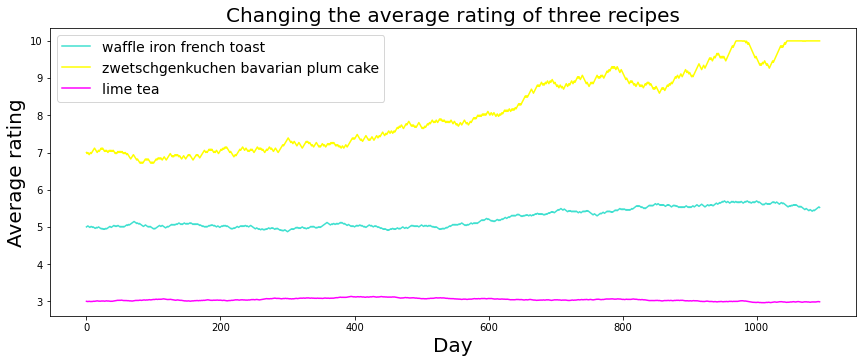

In [3]:
f = plt.figure(figsize = (14,5))
fig = f.add_axes([0.1, 0.1, 0.8, 0.8])
colors = ['turquoise', 'yellow', 'magenta']
l1 = fig.plot(df[0], label = 'waffle iron french toast', color = colors[0])
l2 = fig.plot(df[1], label = 'zwetschgenkuchen bavarian plum cake', color = colors[1])
l3 = fig.plot(df[2], label = 'lime tea', color = colors[2])
fig.set_xlabel('Day', fontsize = 20)
fig.set_ylabel('Average rating', fontsize = 20)
fig.set_title('Changing the average rating of three recipes', fontsize = 20)
fig.legend(fontsize=14)
fig

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


<Axes:title={'center':'Changing the average rating of three recipes'}, xlabel='Date', ylabel='Average rating'>

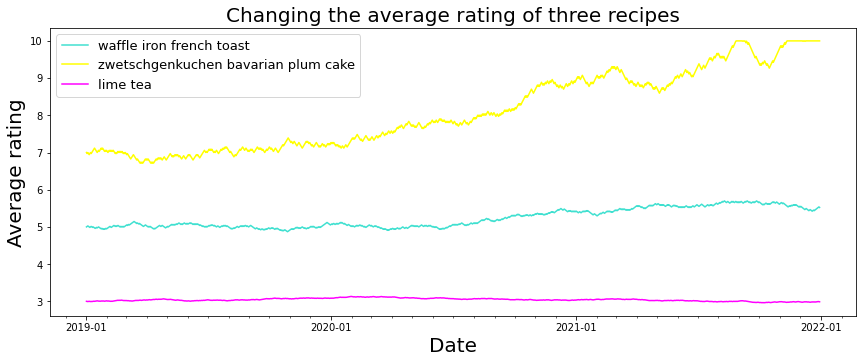

In [4]:
limit = np.arange(np.datetime64('2019-01-01'),np.datetime64('2021-12-31'), np.timedelta64(1, 'D'))
f = plt.figure(figsize = (14,5))
fig = f.add_axes([0.1, 0.1, 0.8, 0.8])
labels = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
colors = ['turquoise', 'yellow', 'magenta']
for i in range (df.shape[0]):
    fig.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
    fig.xaxis.set_minor_locator(mdates.MonthLocator()) 
    fig.plot(limit, df[i], label = labels[i], color = colors[i])
fig.set_xlabel('Date', fontsize = 20)
fig.set_ylabel('Average rating', fontsize = 20)
fig.set_title('Changing the average rating of three recipes', fontsize = 20)
fig.legend(fontsize=13)
fig

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0.5, 1.0, 'Changing the average rating of three recipes')

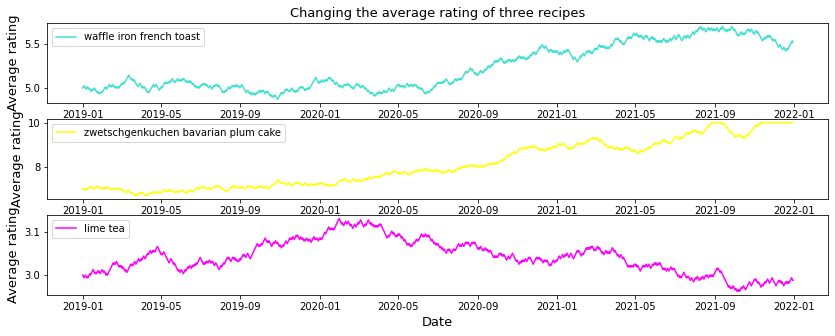

In [5]:
limit = np.arange(np.datetime64('2019-01-01'),np.datetime64('2021-12-31'), np.timedelta64(1, 'D'))
fig, axs = plt.subplots(3, figsize = (14,5))
labels = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
colors = ['turquoise', 'yellow', 'magenta']
for i in range (len(axs)):
    axs[i].plot(limit, df[i], label = labels[i], color = colors[i])
    axs[i].set_xlabel('Date', fontsize = 13)
    axs[i].set_ylabel('Average rating', fontsize = 13)
    axs[i].legend(fontsize = 10, loc = 'upper left')
axs[0].set_title('Changing the average rating of three recipes', fontsize = 13)

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [6]:
data = np.load('visitors.npy')
data

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

Text(0.5, 0.98, 'Changing the number of users on a linear and logarithmic scale')

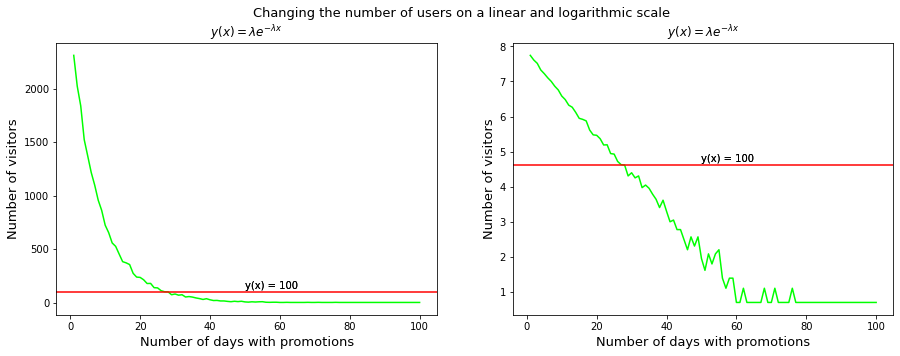

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax1.plot(np.arange(1, 101), data, color = 'lime')
ax2.plot(np.arange(1, 101), np.log(data), color = 'lime')
ax1.set_title('$y(x) = \lambda e^{-\lambda x}$')
ax2.set_title('$y(x) = \lambda e^{-\lambda x}$')
axs = [ax1, ax2]
for i in range(len(axs)):
    axs[i].set_xlabel('Number of days with promotions', fontsize = 13)
    axs[i].set_ylabel('Number of visitors', fontsize = 13)
    axs[0].text(50, 130, 'y(x) = 100')
    axs[1].text(50, 4.7, 'y(x) = 100')
    if i == 0: 
        axs[i].axhline(y = 100, color = 'r', linestyle = '-')
    else:
        axs[i].axhline(y = np.log(100), color = 'r', linestyle = '-')
fig.suptitle('Changing the number of users on a linear and logarithmic scale', fontsize = 13)

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [8]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [9]:
def time(i):
    if i < 5:
        return 'short'
    elif 5 <= i <= 50:
        return 'average'
    elif i >= 50: 
        return 'long'

Text(0.5, 1.0, 'Recipe group sizes')

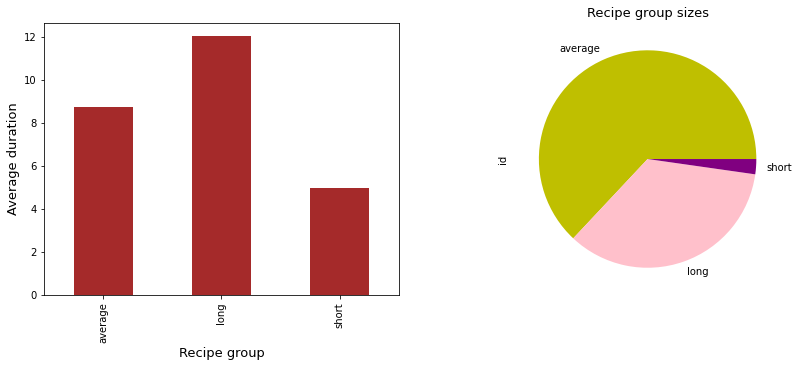

In [10]:
recipes['l'] = recipes['minutes'].apply(time) 
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))
recipes.groupby('l').mean()['n_steps'].plot.bar(ax = ax1, color = 'brown')
recipes.groupby('l').count()['id'].plot.pie(ax = ax2, colors = ['y', 'pink', 'purple'])
ax1.set_xlabel('Recipe group', fontsize = 13)
ax1.set_ylabel('Average duration', fontsize = 13)
ax2.set_title('Recipe group sizes', fontsize = 13)

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [11]:
import datetime

Text(0.5, 0.98, 'Review rating histograms in 2008 and 2009')

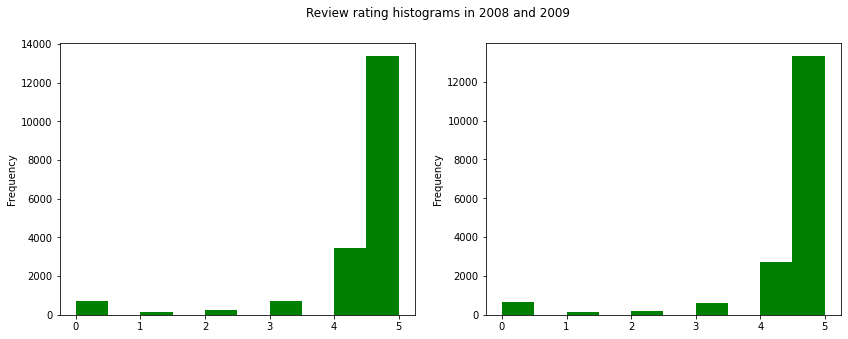

In [12]:
reviews['date'] = reviews['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').year)
r_2008 = reviews[reviews['date'] == 2008]
r_2009 = reviews[reviews['date'] == 2009]
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))
ax1 = r_2008['rating'].plot.hist(ax = ax1, color = 'green')
ax2 = r_2009['rating'].plot.hist(ax = ax2, color = 'green')
fig.suptitle('Review rating histograms in 2008 and 2009')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

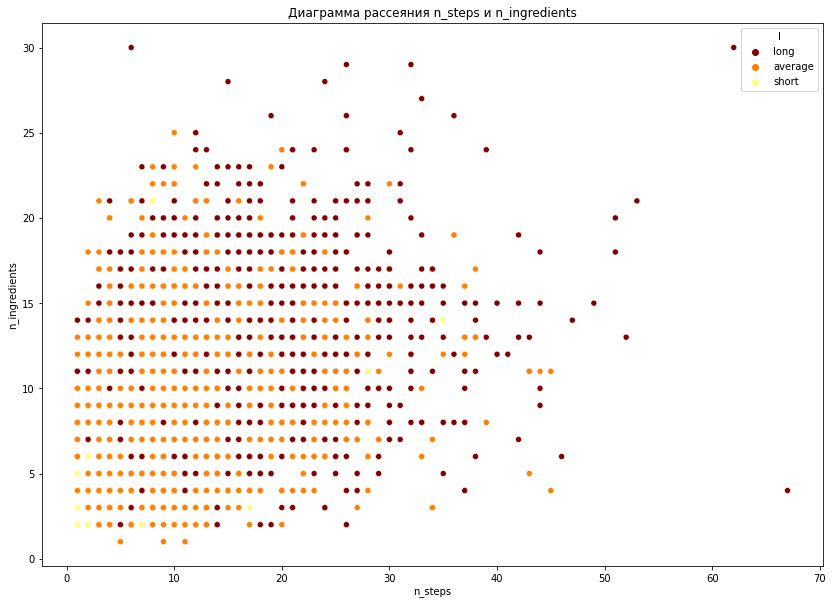

In [13]:
fig, axs = plt.subplots(figsize = (14,10))
sns.scatterplot(data = recipes, x = 'n_steps', y = 'n_ingredients', hue = 'l', palette = 'afmhot')
axs.set_title('Диаграмма рассеяния n_steps и n_ingredients')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

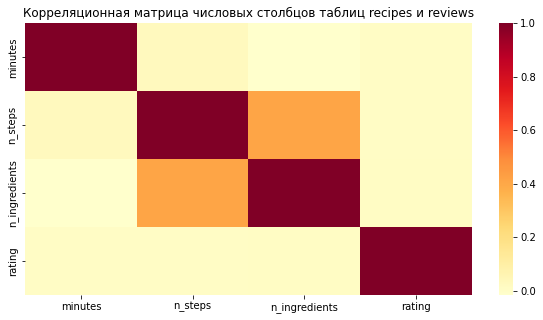

In [15]:
res = pd.merge(reviews, recipes, left_index = True, right_index = True)
new = res[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr() # исключает NA/null()
fig, axs = plt.subplots(figsize = (10, 5))
sns.heatmap(new, cmap="YlOrRd")
axs.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')